In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


**EDA и ресерч-анализ**

In [78]:
df = pd.read_csv("/content/dataset.csv")
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [79]:
df.shape

(114000, 21)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [81]:
print(df.describe())

df = df.dropna()

print(df.isnull().sum())

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

Датасет включает  следующие колонки:
- Track_id - идентификатор песни.
- Artists - имена или псевдонимы артистов.
- Album_namе - название альбома, из которого была взята композиция.
- Track_name - наименование песни.
- Popularity - индекс популярности песни, от 0 до 100 включительно.
- Duration_ms - длина песни в миллисекундах.
- Explicit - значение, показывающее, присутствует ли в песне нецензурная брань.
- Danceability - показатель того, насколько песня подходит для танцев.
- Energy - показатель энергичности песни.
- Кеу - тональность песни.
- Loudness - показатель громкости песни.
- Mode - режим аудиозаписи.
- Speechiness - показатель красноречивости текста в песне.
- Acousticness - показатель звучания песни.
- Instrumentalness - показатель звучания инструментов в песне.
- Liveness - показатель живости песни.
- Valence - валентность песни.
- Теmро - темп песни, указыватся в ударах в минуту.
- Time_signature - размер такта.
- Track-genre - жанр песни.

> Как мы видим он состоит из 114000 песен, по 1000 от каждого жанра.

In [82]:
print(df['track_genre'].value_counts())

track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64



> **Гистограмма, позволяющая увидеть, как значения популярности распределены по диапазону – количество треков.**


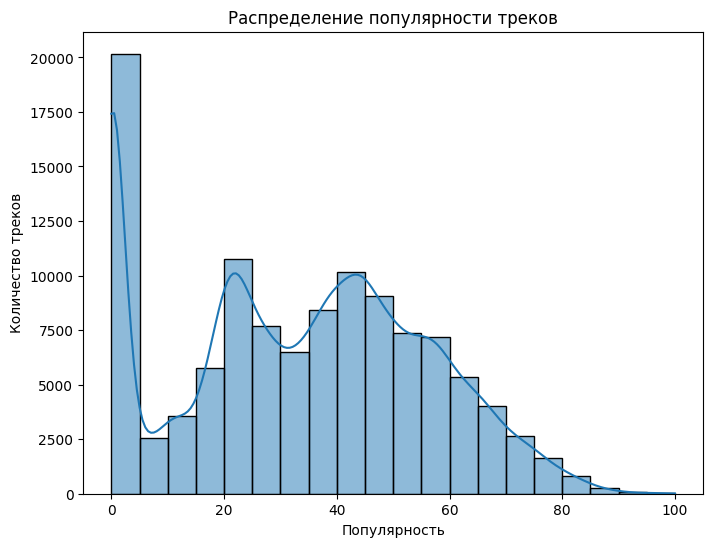

In [83]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='popularity', bins=20, kde=True)
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Количество треков')
plt.show()

**Корреляционная матрица**

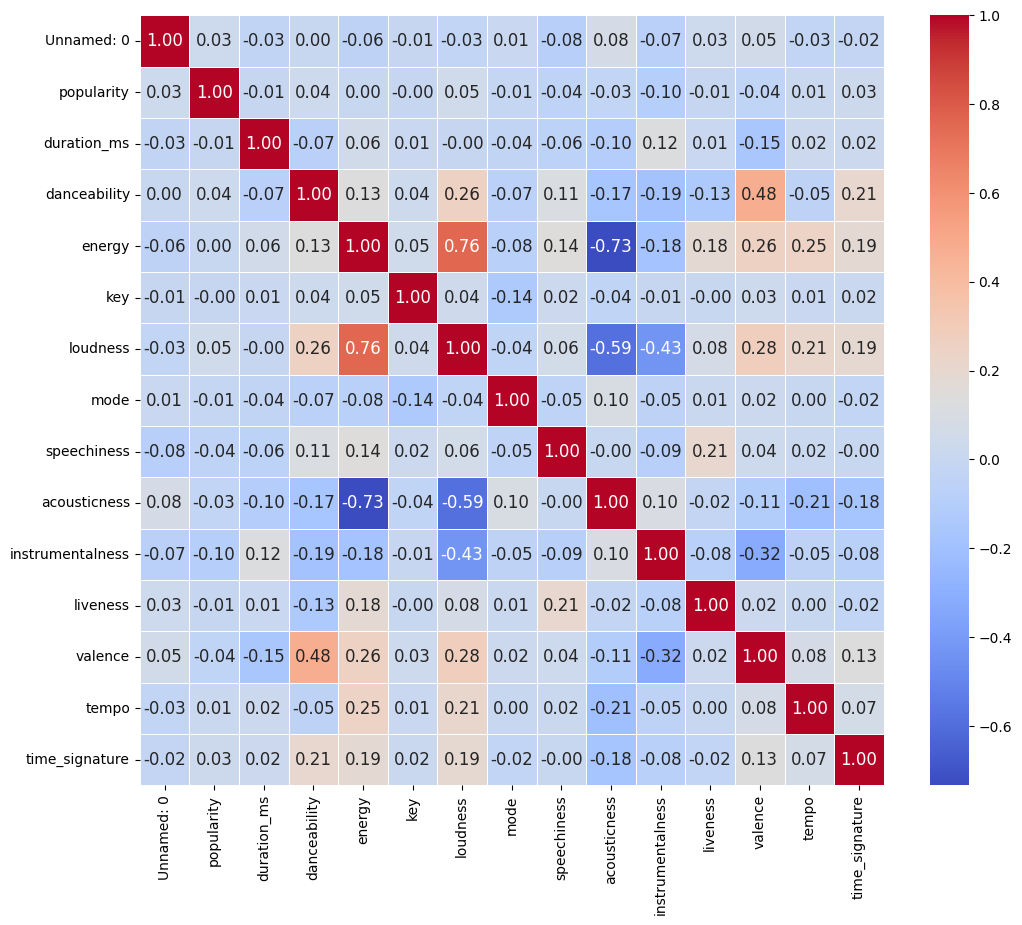

In [84]:
numerical_columns = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_columns]

df_numerical = df_numerical.fillna(0)

plt.figure(figsize=(12, 10))
corr = df_numerical.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 12}, fmt='.2f', linewidths=0.5)
plt.show()

Видно, что ключевая переменная popularity не имеет сильной корреляции ни с одним признаком. Все признаки приблизительно одинаково влияют на популярность. Чуть сильнее дургих влияют признаки explicit, danceability, loudness и track_genre.

**Диаграмма, показывающая среднюю популярность треков по жанрам, выделяя топ-20 самых популярных жанров.**

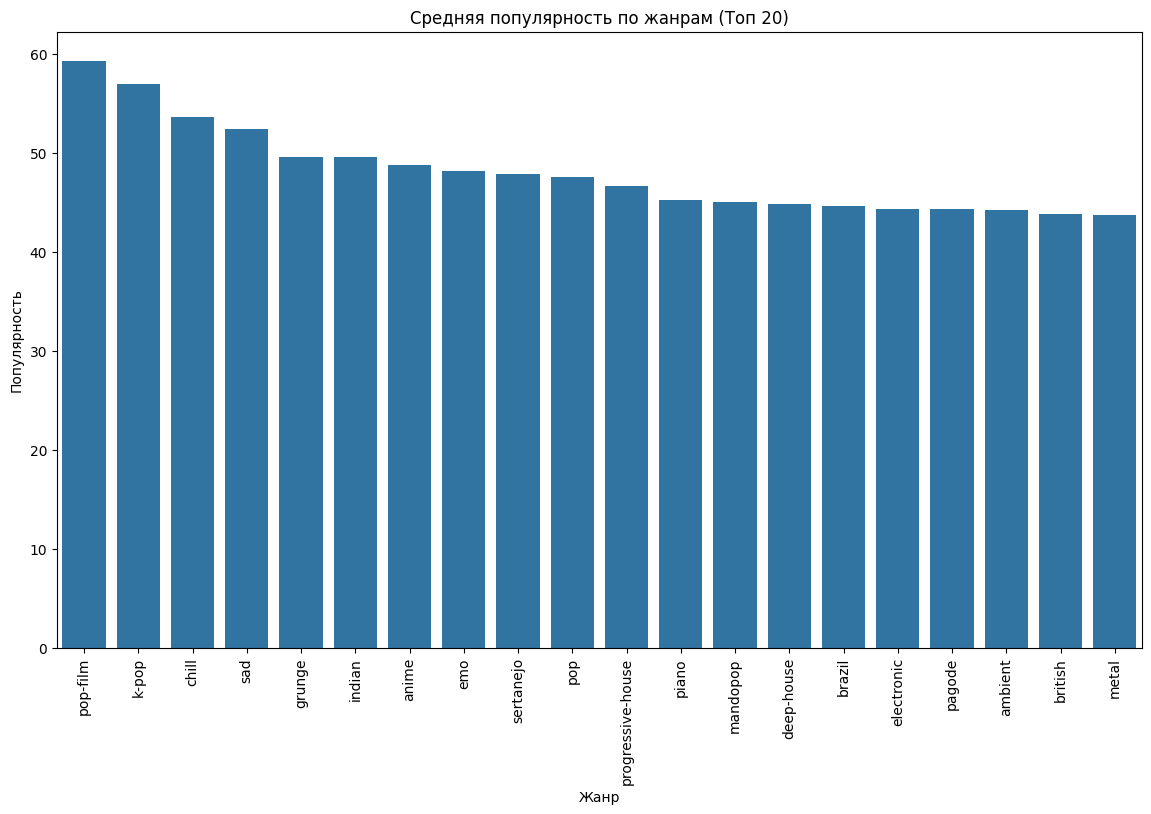

In [85]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().reset_index()
genre_popularity_sorted = genre_popularity.sort_values(by='popularity', ascending=False)
top_20_popular_genres = genre_popularity_sorted.head(20)['track_genre']
top_20_popular_genres_df = df[df['track_genre'].isin(top_20_popular_genres)]

plt.figure(figsize=(14,8))
sns.barplot(data=top_20_popular_genres_df, x='track_genre', y='popularity', errorbar=None, order=top_20_popular_genres)
plt.title('Средняя популярность по жанрам (Топ 20)')
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.xticks(rotation=90)
plt.show()

Самыми популярными жанрами являются dance, rock и pop, с популярностью выше 70

**График зависимости популярности от длины трека.**

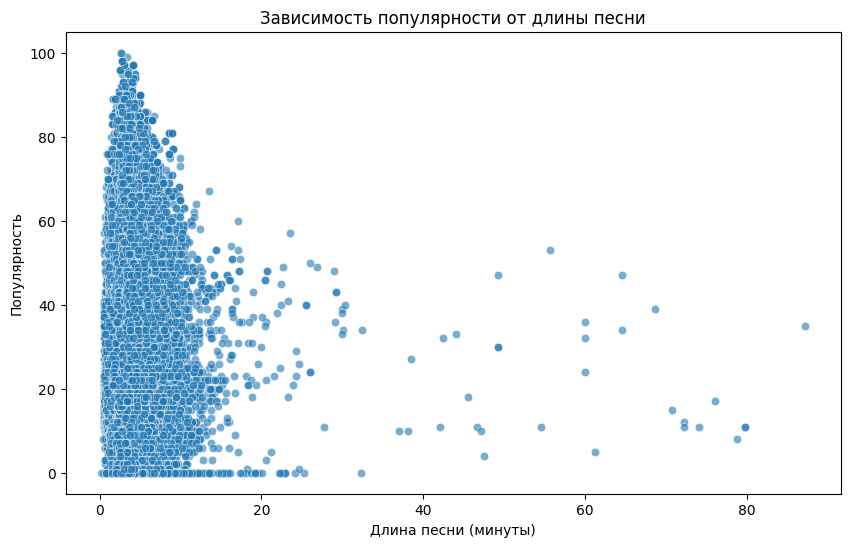

In [86]:
# Преобразование длины песни из миллисекунд в минуты для лучшей интерпретации
df['duration_min'] = df['duration_ms'] / 60000

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_min', y='popularity', alpha=0.6)
plt.title('Зависимость популярности от длины песни')
plt.xlabel('Длина песни (минуты)')
plt.ylabel('Популярность')
plt.show()

Треки с высокой популярностью имеют небольшую продолжительность.

**График, показывающий кто из исполнителей доминирует по количеству треков**

<ipython-input-87-9d8b52cb333e>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




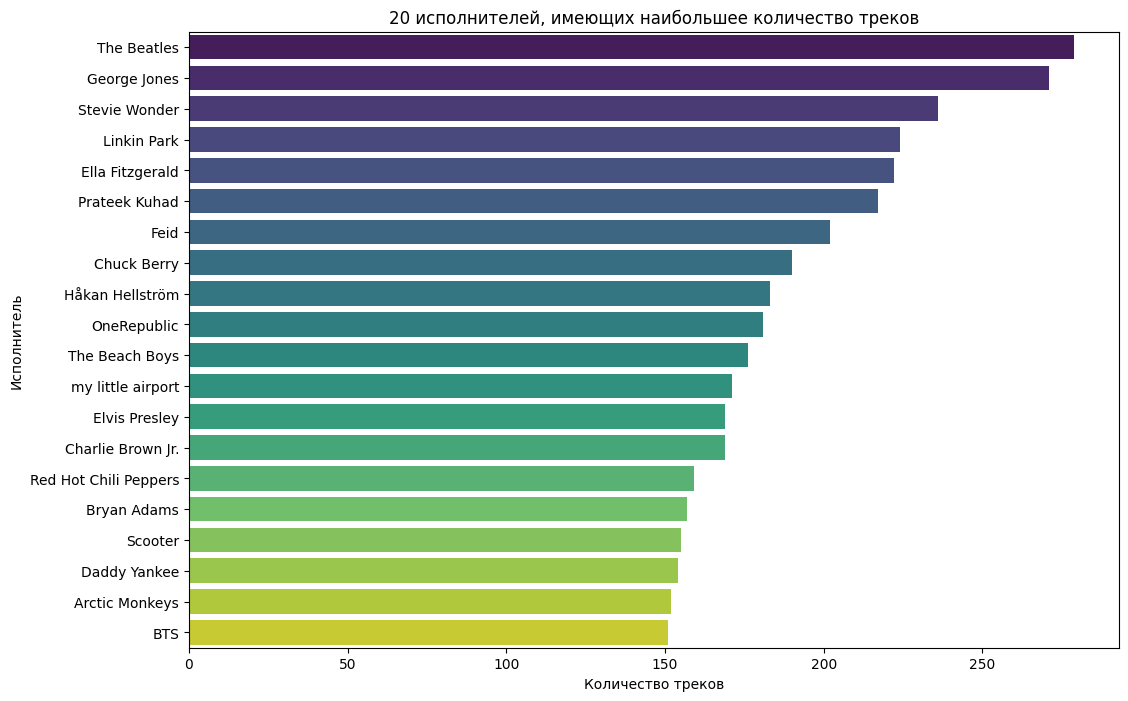

In [87]:
artist_popularity = df['artists'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette='viridis')
plt.title('20 исполнителей, имеющих наибольшее количество треков')
plt.xlabel('Количество треков')
plt.ylabel('Исполнитель')
plt.show()

**График демонстрирует топ-20 популярных исполнителей по популярности их треков (средней).**

<ipython-input-88-1bcabeac83ff>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




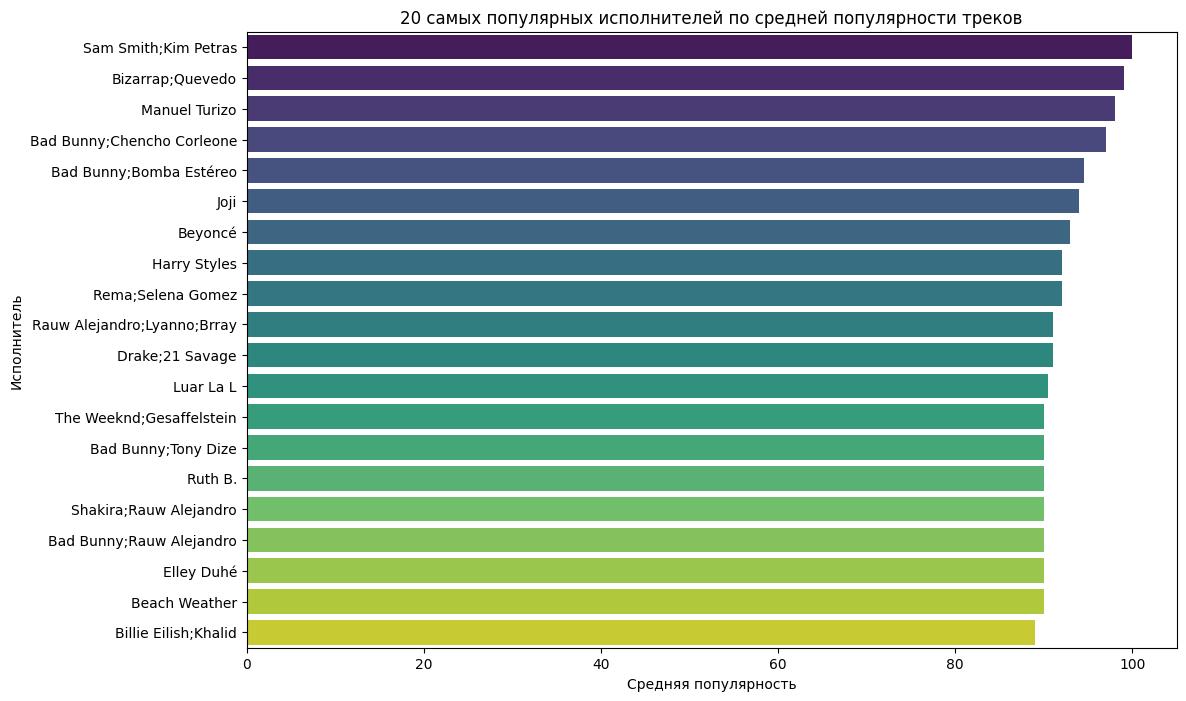

In [88]:
artist_popularity = df.groupby('artists')['popularity'].mean().reset_index()
artist_popularity_sorted = artist_popularity.sort_values(by='popularity', ascending=False)
top_20_popular_artists = artist_popularity_sorted.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='popularity', y='artists', data=top_20_popular_artists, palette='viridis')
plt.title('20 самых популярных исполнителей по средней популярности треков')
plt.xlabel('Средняя популярность')
plt.ylabel('Исполнитель')
plt.show()

**Диаграммы рассеяния, демонстрирующие взаимосвязь между скорость (tempo) и популярностью (populrity), энергичностью (energy) и ритмичностью (danceability)  и громкостью (loudness), энергичностью (energy) треков**

In [89]:
px.scatter(df,x='tempo',y='popularity',color='tempo',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b>Tempo Versus Popularity')

Популярность треков не имеет явной зависимости от темпа

In [90]:
px.scatter(df,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='<b>Energy Versus Danceability')

Ритмичность музыкальных треков в значительной степени не зависит от уровня их энергичности (существует слабая положительная корреляция).

In [91]:
px.scatter(df,x='energy',y='loudness',color_discrete_sequence=['lightgreen'],template='plotly_dark',title='<b>Energy versus Loudness correlation')

Энергичность треков положительно коррелирует с их громкостью.

**Основные выводы после проведения EDA и ресерч-анализа:**

1. Большая часть треков имеет низкую популярность (примерно 16000 из них имеют популярность равную 0)

2. Отсутствует сильная линейная зависимость между целевой переменной popularity и другими переменными.

3. Треки с меньшей длительностью (< 5 минут) более популярны

# **Feature-Engineering**

Нами была выдвинута гипотеза о том, что количество треков в одном альбоме может влиять на популярность каждого отдельного трека в этом альбоме. Теоретически это может быть обусловлено тем, что если в альбоме присутствует популярная песня, послушавшие её люди могут захотеть услышать и другие треки из этого альбома.

Исходя из этого, мы создали новый признак - количество треков в альбоме для каждой песни.

Основываясь на той же логике, создали ещё один признак - общее количество треков у автора каждой песни.

Так как в ходе анализа данных была выявлена зависимость популярности от длины трека, мы создали дополнительный признак - класс длительности. Если длина трека меньше 5 минут - класс 0, от 5 до 10 минут - класс 1, больше 10 минут - класс 2.


In [92]:
data = pd.read_csv("/content/dataset.csv")
data = data.dropna()

In [93]:
albums_count = (data.groupby(['album_name'], as_index=False)
                .agg({'track_id': 'count'})
                .rename(columns={'track_id': 'count_in_album'})
                .set_index('album_name')['count_in_album']
                .to_dict())

artist_songs_count = (data.groupby(['artists'], as_index=False)
                .agg({'track_id': 'count'})
                .rename(columns={'track_id': 'artist_songs_count'})
                .set_index('artists')['artist_songs_count']
                .to_dict())

data['count_in_album'] = data['album_name'].apply(lambda x: albums_count[x])
data['artist_songs_count'] = data['artists'].apply(lambda x: artist_songs_count[x])


data['duration_class'] = 0
data.loc[data['duration_ms']  <= 300000, 'duration_class'] = 0
data.loc[data['duration_ms']  > 300000, 'duration_class'] = 1
data.loc[data['duration_ms'] >= 600000, 'duration_class'] = 2


Удаление колонок с ненужными данными, которые служат лишь для идентификации записей.

In [94]:
data = data.drop(columns=['Unnamed: 0', 'track_id', 'track_name'])

Категоризация данных

In [95]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['artists'] = labelencoder.fit_transform(data['artists'].values)
data['track_genre'] = labelencoder.fit_transform(data['track_genre'].values)
data['album_name'] = labelencoder.fit_transform(data['album_name'].values)
data["explicit"] = data["explicit"].astype(int)
data

artists  album_name  popularity  duration_ms  explicit  danceability  \
0         10357        8100          73       230666         0         0.676   
1          3287       14796          55       149610         0         0.420   
2         12397       39162          57       210826         0         0.438   
3         14839        8580          71       201933         0         0.266   
4          5255       16899          82       198853         0         0.618   
...         ...         ...         ...          ...       ...           ...   
113995    22486          66          21       384999         0         0.172   
113996    22486          66          22       385000         0         0.174   
113997     4952        5028          22       271466         0         0.629   
113998    18534        7238          41       283893         0         0.587   
113999     4952       24357          22       241826         0         0.526   

        energy  key  loudness  mode  ...  acousticness  instrumentalness  \
0       0.4610    1    -6.746     0  ...        0.0322          0.000001   
1       0.1660    1   -17.235     1  ...        0.9240          0.000006   
2       0.3590    0    -9.734     1  ...        0.2100          0.000000   
3       0.0596    0   -18.515     1  ...        0.9050          0.000071   
4       0.4430    2    -9.681     1  ...        0.4690          0.000000   
...        ...  ...       ...   ...  ...           ...               ...   
113995  0.2350    5   -16.393     1  ...        0.6400          0.928000   
113996  0.1170    0   -18.318     0  ...        0.9940          0.976000   
113997  0.3290    0   -10.895     0  ...        0.8670          0.000000   
113998  0.5060    7   -10.889     1  ...        0.3810          0.000000   
113999  0.4870    1   -10.204     0  ...        0.6810          0.000000   

        liveness  valence    tempo  time_signature  track_genre  \
0         0.3580   0.7150   87.917               4            0   
1         0.1010   0.2670   77.489               4            0   
2         0.1170   0.1200   76.332               4            0   
3         0.1320   0.1430  181.740               3            0   
4         0.0829   0.1670  119.949               4            0   
...          ...      ...      ...             ...          ...   
113995    0.0863   0.0339  125.995               5          113   
113996    0.1050   0.0350   85.239               4          113   
113997    0.0839   0.7430  132.378               4          113   
113998    0.2700   0.4130  135.960               4          113   
113999    0.0893   0.7080   79.198               4          113   

        count_in_album  artist_songs_count  duration_class  
0                    4                  10               0  
1                    2                  13               0  
2                    1                   1               0  
3                    1                  15               0  
4                    6                  11               0  
...                ...                 ...             ...  
113995               4                   4               1  
113996               4                   4               1  
113997              26                  14               0  
113998               2                  30               0  
113999               2                  14               0  

[113999 rows x 21 columns]

In [96]:
data = data.dropna()

После создания новых признаков появилась отчётливая корреляция одного из них с популярностью.

<Axes: >

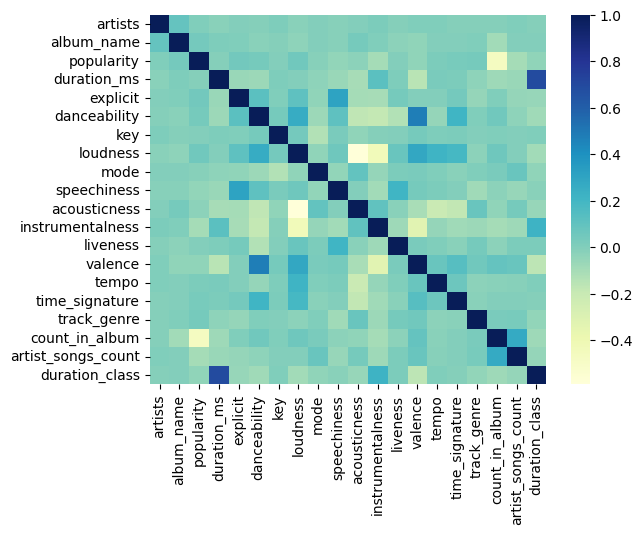

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

data.drop(['energy'],inplace=True,axis=1)
c_data = data.corr(method='pearson')

sns.heatmap(c_data, cmap='YlGnBu')

Подготовка данных

In [98]:
X = data.loc[:, data.columns != 'popularity']
Y = data['popularity']


In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# **RandomForestRegressor**

In [100]:
from sklearn.ensemble import RandomForestRegressor
fregressor = RandomForestRegressor(max_depth=20, random_state=42)
fregressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

prediction = fregressor.predict(x_test)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
mape = mean_absolute_percentage_error(y_test, prediction)

print('mse:', mse)
print('mae:', mae)
print('r2:', r2)
print('mape:', mape)

mse: 139.24142957352686
mae: 8.440997326650674
r2: 0.7206909900624628
mape: 3186099106716355.0


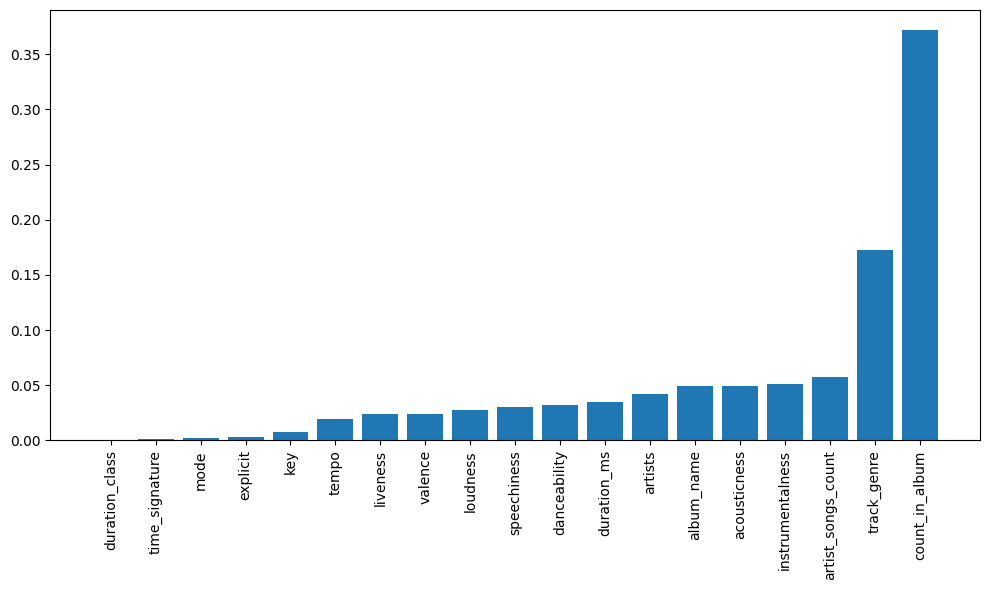

In [102]:
features_imp = fregressor.feature_importances_
names = x_train.columns
sorted_idx = np.argsort(features_imp)[::1]
sorted_feature_imp = features_imp[sorted_idx]
sorted_feature_names = names[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_imp)), sorted_feature_imp)
plt.xticks(range(len(sorted_feature_imp)), sorted_feature_names, rotation=90)
plt.tight_layout()
plt.show()

# **GradientBoostingRegressor**

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
gbregressor = GradientBoostingRegressor(max_depth=10)
gbregressor.fit(x_train, y_train)


GradientBoostingRegressor(max_depth=10)

In [104]:
prediction = gbregressor.predict(x_test)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
mape = mean_absolute_percentage_error(y_test, prediction)

print('mse:', mse)
print('mae:', mae)
print('r2:', r2)
print('mape:', mape)

mse: 113.4040642766827
mae: 7.567810787831972
r2: 0.7725190195689056
mape: 3067684778912701.0


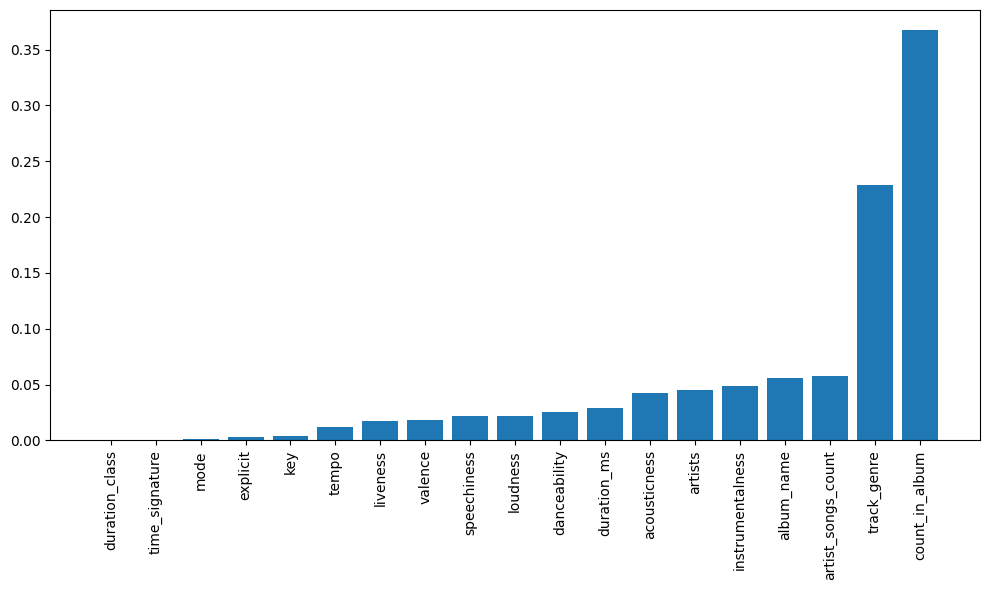

In [105]:
features_imp = gbregressor.feature_importances_
names = x_train.columns
sorted_idx = np.argsort(features_imp)[::1]
sorted_feature_imp = features_imp[sorted_idx]
sorted_feature_names = names[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_imp)), sorted_feature_imp)
plt.xticks(range(len(sorted_feature_imp)), sorted_feature_names, rotation=90)
plt.tight_layout()
plt.show()

# **LinearRegression**

In [106]:
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()
lregressor.fit(x_train, y_train)


LinearRegression()

In [107]:
prediction = lregressor.predict(x_test)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
mape = mean_absolute_percentage_error(y_test, prediction)

print('mse:', mse)
print('mae:', mae)
print('r2:', r2)
print('mape:', mape)


mse: 367.6760351105359
mae: 15.736833811503281
r2: 0.26246642497839046
mape: 1.3390368698218802e+16


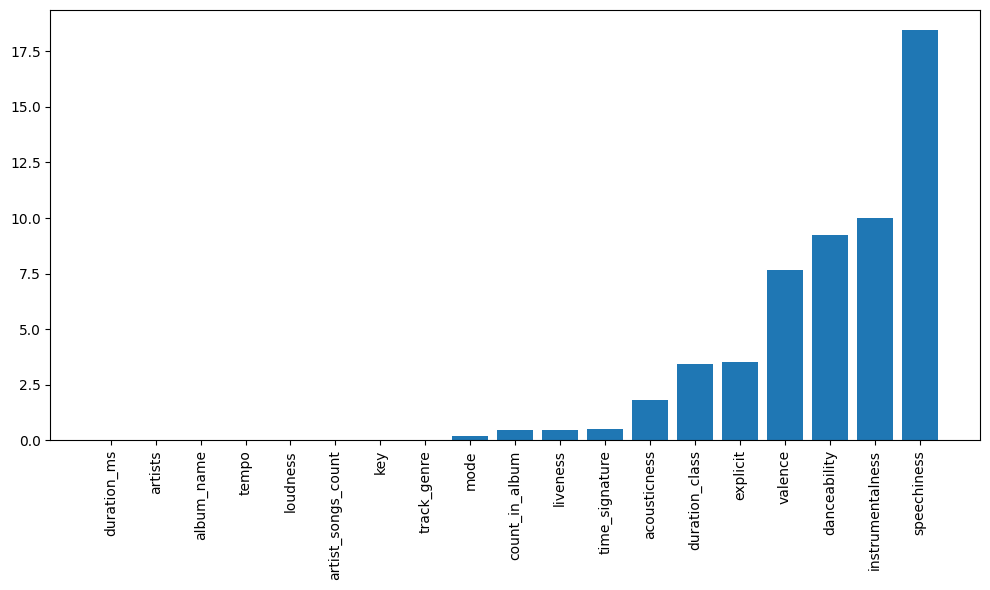

In [108]:
features_imp = np.abs(lregressor.coef_)
names = x_train.columns
sorted_idx = np.argsort(features_imp)[::1]
sorted_feature_imp = features_imp[sorted_idx]
sorted_feature_names = names[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_imp)), sorted_feature_imp)
plt.xticks(range(len(sorted_feature_imp)), sorted_feature_names, rotation=90)
plt.tight_layout()
plt.show()

In [109]:
shape = x_train.shape
shape

(91199, 19)

# **Нейросеть**

In [110]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [111]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=[19,]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=['mse', 'mae', 'mape', 'r2_score'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [112]:
early_stop= EarlyStopping(patience=10)

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,callbacks=[early_stop])

Epoch 1/200
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 11977293.0000 - mae: 1107.7765 - mape: 140246073344.0000 - mse: 11977293.0000 - r2_score: -24843.5020 - val_loss: 1876.6489 - val_mae: 37.0831 - val_mape: 462796000.0000 - val_mse: 1876.6489 - val_r2_score: -2.7644
Epoch 2/200
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 9793.0244 - mae: 40.8476 - mape: 5101996032.0000 - mse: 9793.0244 - r2_score: -18.6723 - val_loss: 1008.4958 - val_mae: 26.3063 - val_mape: 1467721728.0000 - val_mse: 1008.4958 - val_r2_score: -1.0230
Epoch 3/200
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 3138.7915 - mae: 32.2941 - mape: 4226878976.0000 - mse: 3138.7915 - r2_score: -5.3137 - val_loss: 878.0646 - val_mae: 24.5271 - val_mape: 1922843392.0000 - val_mse: 878.0646 - val_r2_score: -0.7613
Epoch 4/200
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2234.8521 - mae: 27.8146 - mape: 3855850240.0000 - mse: 2234.8521 - r2_score: -3.4839 - val_loss: 710.8067 - val_mae: 21.9772 - va

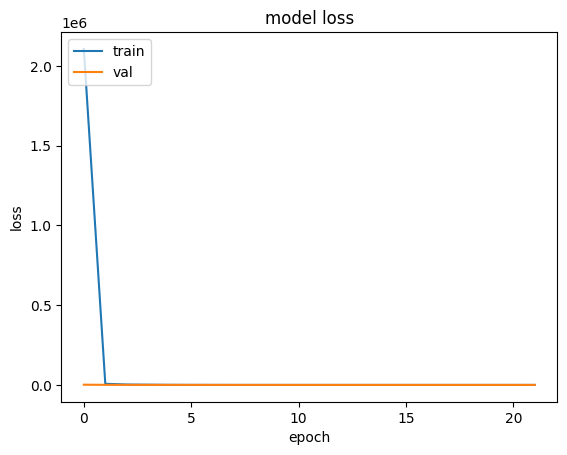

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [114]:
model.evaluate(x_test,y_test,verbose=2)

713/713 - 1s - 1ms/step - loss: 498.3022 - mae: 18.8091 - mape: 4633543168.0000 - mse: 498.3022 - r2_score: 4.3869e-04


[498.30218505859375,
 498.30218505859375,
 18.809078216552734,
 4633543168.0,
 0.000438690185546875]

# **Кросс-валидация**

In [115]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import f1_score
import numpy as np

X = data.loc[:, data.columns != 'popularity'].to_numpy()
Y = data['popularity'].to_numpy().reshape(-1, 1)

# Stratified K-блочная кросс-валидация
skf = StratifiedKFold(n_splits=5)
gbregressor = GradientBoostingRegressor(max_depth=10)

mse = []
mae = []
mape = []
r2 = []
for train_index, test_index in skf.split(X, Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    gbregressor.fit(x_train, y_train.ravel())

    prediction = gbregressor.predict(x_test)
    mse.append(mean_squared_error(y_test, prediction))
    mae.append(mean_absolute_error(y_test, prediction))
    r2.append(r2_score(y_test, prediction))
    mape.append(mean_absolute_percentage_error(y_test, prediction))

print(f'Средний mse: {np.mean(mse)}')
print(f'Средний mae: {np.mean(mae)}')
print(f'Средний mape: {np.mean(mape)}')
print(f'Средний r2: {np.mean(r2)}')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Средний mse: 285.3397297599011
Средний mae: 12.926531799051816
Средний mape: 7624098365033802.0
Средний r2: 0.4264420549015003


# **Дополнительный эксперимент**
Изначальные данные имели большое количество треков со значением популярности 0, их число кратно превосходило любое другое значение. Мы не смогли решить, является ли такая ситуация нормальной, или это следует считать аномалией. Основные эксперименты было решено проводить не изменяя пропорций значений. Но в конце мы решили провести дополнительный эксперимент, удалив в случайном порядке подавляющее большинство треков с популярностью 0, чтобы распределение треков по популярности было больше похоже на нормальное. После этого мы ещё раз обучили самую удачную модель, чтобы посмотреть, увеличится ли её точность от такого изменения тренировочных данных.

In [116]:
zero_popularity = data[data['popularity'] == 0]

other_data = data[data['popularity'] != 0]
random_zeros = zero_popularity.sample(n=12000, random_state=42)
remaining_zeros = zero_popularity.drop(random_zeros.index)
data = pd.concat([other_data, remaining_zeros])


In [117]:
data['popularity'].value_counts()

popularity
0      4019
22     2354
21     2344
44     2288
1      2140
       ... 
94        7
98        7
95        5
100       2
99        1
Name: count, Length: 101, dtype: int64

In [118]:
X = data.loc[:, data.columns != 'popularity']
Y = data['popularity']

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
gbregressor = GradientBoostingRegressor(max_depth=10)
gbregressor.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=10)

In [121]:
prediction = gbregressor.predict(x_test)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
mape = mean_absolute_percentage_error(y_test, prediction)

print('mse:', mse)
print('mae:', mae)
print('r2:', r2)
print('mape:', mape)

mse: 112.41146846335987
mae: 7.822946286663763
r2: 0.7247994711500159
mape: 1439979130081360.8


Эксперимент показал, что точность модели уменьшилась, хотя и незначительно. В связи с этим мы считаем изначальные данные более подходящими для обучения моделей предсказывания популярности трека, а изначальные эксперименты более удачными.

# **Основные выводы по работе:**

1) Изначальные данные имели малую корреляцию с целевой переменной, на их основе нельзя было создать модели с хоть сколько-нибудь приемлемой точностью.

2) Создание новых признаков помогло улучшить точность моделей. Были обучены 4 модели из разных семейств, они показали разную точность.

3) Самой успешной из всех моделей оказалась модель градиентного бустинга, её изначальный r2_score составил 0.768, однако на кросс-валлидации точность оказалась ощутимо ниже. Однако даже такой результат является значительным улучшением по сравнению с изначальными результатами, полученными до проведения feature engineering.